In [1]:
__nbid__ = '0006'
__author__ = 'Ragadeepika Pucha <raga.pucha@utah.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>' 
__version__ = '20251215' # yyyymmdd
__datasets__ = ['desi_dr1', 'sdss_dr12', 'sdss_dr17']  
__keywords__ = ['sparcl', 'spectra', 'database'] 

# Comparing SDSS and DESI spectra using SPARCL

*Ragadeepika Pucha (U.Utah), Stéphanie Juneau (NOIRLab), and the Astro Data Lab Team*

### Table of contents
* [Goals & summary](#goals)
* [Disclaimer & attribution](#attribution)
* [Imports & setup](#imports)
* [SPARCL](#sparcl)
* [Candidate selection](#cand_sel)
    * [Data discovery](#data)
    * [Common targets between SDSS DR17 and DESI DR1](#common)
    * [Selecting galaxies with [OII] measurements](#oii_emission)
* [Accessing spectra](#spectral_access)
    * [Comparison of SDSS DR17 and DESI DR1 spectra](#spec_comparison)
* [Resources & references](#resources)

<a class="anchor" id="goals"></a>
# Goals

In this notebook, we use [SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/) (SPectra Analysis and Retrievable Catalog Lab) to compare SDSS DR17 and DESI DR1 spectra. We show how to use the SPARCL data discovery to access available spectra of sources in a specific region of the sky with redshift and spectype constraints. We further compare the spectra from SDSS DR17 and DESI DR1.

# Summary

Spectroscopic study of astronomical objects is crucial for detailed understanding of their physics and evolution. Stellar spectra inform us about the stars' ages, temperatures, and chemical compositions; while galaxy spectra provide us information about the stellar, gas, and dust properties of galaxies, including their kinematics. Spectroscopic surveys therefore enable the detailed statistical analysis of different samples of sources. Two such important spectroscopic surveys are the *Sloan Digital Sky Survey* ([SDSS](https://www.sdss4.org/dr17/)) and the *Dark Energy Spectroscopic Instrument* ([DESI](https://www.desi.lbl.gov/)) survey.

**Sloan Digital Sky Survey (SDSS)**

The SDSS uses the 2.5-m optical telescope at Apache Point Observatory in New Mexico, and has been collecting photometric and spectroscopic data since more than 20 years now. 
The spectroscopic survey for SDSS I/II (2000-2008) was conducted using the "SDSS" spectrograph, that collected spectra from 640 objects at a single time. For SDSS III and later, the existing spectrograph was retired and the 1000-fiber "BOSS" spectrograph was incorporated. Information about the design and performance of these spectrographs is presented in [Smee et al. 2013](https://ui.adsabs.harvard.edu/abs/2013AJ....146...32S/abstract).

**Dark Energy Spectroscopic Instrument (DESI)**

The DESI survey is currently being conducted using the 4-m Mayall Telescope, Kitt Peak Observatory. The 5000-fiber spectrograph has been taking spectra of stars, galaxies, and quasars since 2020. In just over one year, the number of spectra from DESI has surpassed all the existing spectroscopic surveys, including SDSS. The DESI First Data Release (DR1) consists of spectra of over 18 million unique objects observed during the first 13 months of the Main survey ("Year 1"). Is also includes a reprocessing of the same commissioning data and survey validation data that were in the Early Data Release (EDR). The overview of the instrument is presented in [Abareshi et al. 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220510939A/abstract). 

The main comparison between SDSS (BOSS) and DESI spectroscopic surveys are summarized in the table below.

|    Property                        |     SDSS  (BOSS)          | DESI spectrograph          |
|------------------------------------|---------------------------|----------------------------|
|    Fiber diameter                   |          3"  (2")         |          1.5"              |
| Number of spectra at a single time |        640 (1000)         |       5000                 |                       
| Wavelength coverage                | 3800 - 9200 $\mathring A$ |  3600 - 9800 $\mathring A$ |
| Spectral resolution                |  110 - 190 km/s           |   60 - 150 km/s            |
| Targets                            |   r < 17.7 mag            |    r < 24.5 mag            |
| Spatial density                    |    ~ 90 $\rm deg^{-2}$    |     ~ 700 $\rm deg^{-2}$   |

In this notebook, we showcase the data discovery feature of SPARCL and then show how to access SDSS DR17 and DESI DR1 spectra using SPARCL. We further compare the spectra of common objects, focusing on the flux and the spectral resolution that is achievable from the two surveys.

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/about/disclaimers).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

For this notebook specifically, please acknowledge:
* DESI: https://data.desi.lbl.gov/doc/acknowledgments/
* SDSS: https://www.sdss4.org/collaboration/#sdss4acknowledgement
* Astro Data Lab: https://datalab.noirlab.edu/about/acknowledgments
* SPARCL: https://astrosparcl.datalab.noirlab.edu/sparc/acknowledgments

<a class="anchor" id="imports"></a>
# Imports and setup

In [2]:
import numpy as np
np.seterr(divide = 'ignore')    # Ignores division by zero warning

from astropy.table import Table, join, hstack
from astropy.coordinates import SkyCoord, search_around_sky
import astropy.units as u

import matplotlib.pyplot as plt
%matplotlib inline

# Data Lab
from dl import queryClient as qc, authClient as ac
from getpass import getpass

# SPARCL
from sparcl.client import SparclClient

In [3]:
# Authentication
# Much of the functionality of spectrum services can be accessed without explicitly logging into Data Lab (the services then uses an anonymous login). 
# But some capabilities, for instance saving the results of your queries to your virtual storage space, require a login (i.e., you will need a registered user account).

# If you need to log in to Data Lab, uncomment the 'ac.login()' command and respond according to your prompts. 
# If you have previously logged into Data Lab, this cell will simply print your active user name.

# token = ac.login(input("Enter user name: (+ENTER) "), getpass("Enter password: (+ENTER) "))
# ac.whoAmI()

In [4]:
# Making the matplotlib plots look nicer
settings = {
    'font.size':16,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

<a class="anchor" id="sparcl"></a>
# SPARCL

SPARCL (SPectra Analysis and Retrievable Catalog Lab) is a spectral access service of the Community Science and Data Center (CSDC) program of NSF NOIRLab. It enables fast data discovery and spectral access that matches the user's specifications. It currently hosts SDSS DR17, DESI EDR, and DESI DR1 data. More information about this service is accessible [here](https://sparclclient.readthedocs.io/en/latest/). An introductory notebook on how to use SPARCL is available [here](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb).

In [5]:
# Load the SPARCL client for data discovery and spectral access
client = SparclClient()
client

announcement=Data set deprecation notice: on November 19, 2025 the SDSS/BOSS DR16 data sets were deprecated. Please use the new SDSS/BOSS DR17 data sets instead.


(sparclclient:1.2.7, api:13.0, https://astrosparcl.datalab.noirlab.edu/api, client_hash=, verbose=False, connect_timeout=1.1, read_timeout=5400.0, announcement=True)

<a class="anchor" id="cand_sel"></a>
# Candidate selection

We select sources from both SDSS and DESI that have the following constraints:

    1. 208.4 ≤ R.A. ≤ 210.2
    2. 4.8 ≤ Dec ≤ 6.4
    3. 0.1 ≤ z ≤ 0.15
    4. SPECTYPE = GALAXY
    
The region selected is part of the SDSS Great Wall ([Vogeley et al. 2004](https://ui.adsabs.harvard.edu/abs/2004ogci.conf....5V/abstract), [Einasto et al. 2011](https://ui.adsabs.harvard.edu/abs/2011ApJ...736...51E/abstract)). Both SDSS and DESI have spectra in this region. It is therefore perfect for our comparison. The redshift cut is motivated by the SDSS Great Wall structure and is selected so as to compare the [OII] emission line in this region.

<a class="anchor" id="data"></a>
## Data discovery

In [6]:
# The outfields that are required as output from SPARCL
out = ['sparcl_id', 'specid', 'ra', 'dec', 'redshift'] 

# Constraints
# SPECTYPE = 'GALAXY'
# 208.4 <= RA <= 210.2
# 4.8 <= DEC <= 6.4
# 0.1 <= Redshift <= 0.15
# SPECPRIMARY = True -- consider only primary spectra
# "datasetgroup" denotes the required survey (SDSS_BOSS for SDSS-DR17 (SDSS+BOSS data), and DESI for DESI DR1 data)

sdss_cons = {'spectype':['GALAXY'], 'ra':[208.4, 210.2], 'dec':[4.8, 6.4], 'specprimary': [True], 'datasetgroup': ['SDSS_BOSS'], 'redshift': [0.1, 0.15]}
desi_cons = {'spectype':['GALAXY'], 'ra':[208.4, 210.2], 'dec':[4.8, 6.4], 'specprimary': [True], 'data_release': ['DESI-DR1'], 'redshift': [0.1, 0.15]} 

In [7]:
rec_sdss = client.find(outfields=out, constraints=sdss_cons, limit = 5000)
rec_desi = client.find(outfields=out, constraints=desi_cons, limit = 5000)

In [8]:
ra_sdss = np.array([rec['ra'] for rec in rec_sdss.records])
dec_sdss = np.array([rec['dec'] for rec in rec_sdss.records])

ra_desi = np.array([rec['ra'] for rec in rec_desi.records])
dec_desi = np.array([rec['dec'] for rec in rec_desi.records])

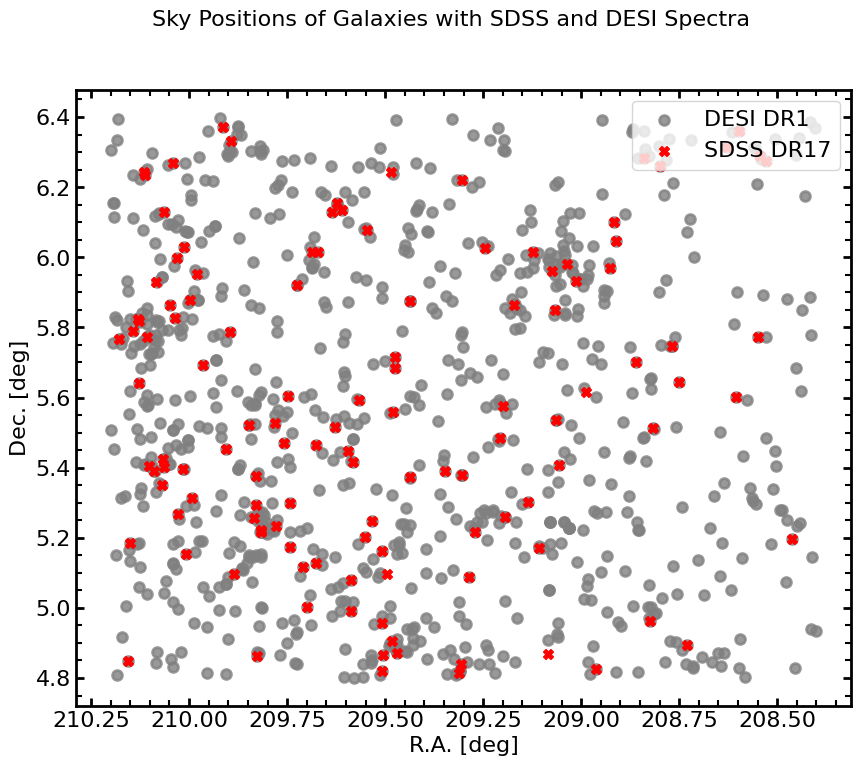

In [9]:
# Overlap of sources

plt.figure(figsize = (10,8))

plt.suptitle('Sky Positions of Galaxies with SDSS and DESI Spectra', fontsize = 16)

plt.scatter(ra_desi, dec_desi, color = 'grey', marker = 'o', s = 50, alpha = 0.8, lw = 2.0, label = 'DESI DR1')
plt.scatter(ra_sdss, dec_sdss, color = 'r', marker = 'X', s = 50, label = 'SDSS DR17')
plt.gca().invert_xaxis()
plt.xlabel('R.A. [deg]')
plt.ylabel('Dec. [deg]')
plt.legend(loc = 'upper right', fontsize=16);

From this figure, we clearly see that the DESI target density is much higher than SDSS.

<a class="anchor" id="common"></a>
## Common targets between SDSS DR17 and DESI DR1

We use the astropy's `search_around_sky` function to find common sources between the two catalogs.

In [10]:
# Find common sources between SDSS and DESI

cat_desi = SkyCoord(ra = ra_desi*u.deg, dec = dec_desi*u.deg)
cat_sdss = SkyCoord(ra = ra_sdss*u.deg, dec = dec_sdss*u.deg)

ii_desi, ii_sdss, _, _ = search_around_sky(cat_desi, cat_sdss, 0.5*u.arcsec)

In [11]:
desi_common = [rec_desi.records[ii] for ii in ii_desi]
sdss_common = [rec_sdss.records[ii] for ii in ii_sdss]

In [12]:
t_desi_common = Table(desi_common)
t_sdss_common = Table(sdss_common)

In [13]:
# Combining the two tables into a single table

t_comb = hstack([t_desi_common, t_sdss_common], table_names=['desi', 'sdss'])

In [14]:
print ('Number of unique SDSS objects: ', len(np.unique(t_comb['specid_sdss'])))
print ('Number of unique DESI objects: ', len(np.unique(t_comb['specid_desi'])))

Number of unique SDSS objects:  116
Number of unique DESI objects:  122


In [15]:
# This suggests that some SDSS object have been matched with two DESI objects.
# We remove that particular object from our selection

sdss_ids_unique, indices, n_counts = np.unique(t_comb['specid_sdss'].data, return_index=True, return_counts=True)
sdss_id_repeated = sdss_ids_unique[n_counts > 1]

# Removing these cases for now (Exercise: investigate what happened in those cases)
t_comb_unique = t_comb[indices]

In [16]:
z_desi = t_comb_unique['redshift_desi']
z_sdss = t_comb_unique['redshift_sdss']

In [17]:
len(z_desi), len(z_sdss)

(116, 116)

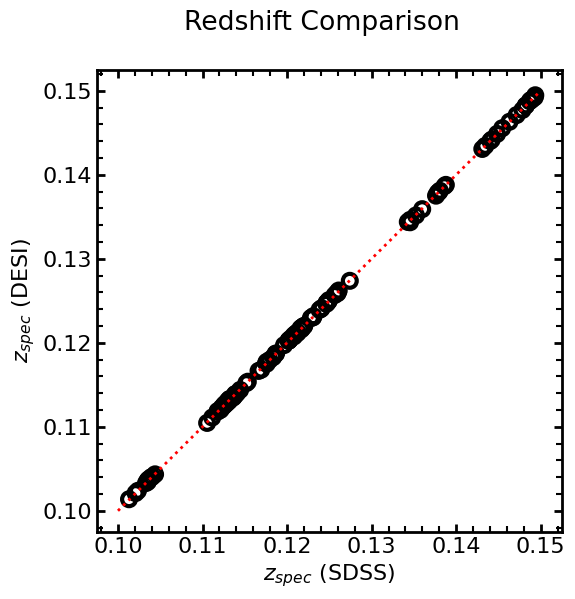

In [18]:
# Comparison of redshifts
plt.figure(figsize = (6,6))
plt.suptitle('Redshift Comparison')

plt.scatter(z_sdss, z_desi, edgecolors = 'k', marker = 'o', s = 100, lw = 3.0, facecolors = 'none')
plt.plot([0.1, 0.15], [0.1,0.15], ls = ':', color = 'r', lw = 2.0)
plt.xlabel('$z_{spec}$ (SDSS)')
plt.ylabel('$z_{spec}$ (DESI)');

We found 116 common sources between SDSS DR17 and DESI DR1 with all our imposed constraints. The above figure compares the redshifts of these common sources from the two surveys.

<a class="anchod" id="oii_emission"></a>
## Selecting galaxies with [OII] measurements

The [OII] doublet (3726 $\mathring A$ and 3728 $\mathring A$) is typically hard to resolve, but is often used to select high-redshift emission-line galaxies. To compare the SDSS DR17 and DESI DR1 spectra, we want to select the galaxy with high [OII] flux. For this purpose, we first select galaxies in the region of interest with non-zero [OII] measurements.

We access the "emissionlinesport" catalog from the SDSS DR12 database (`sdss_dr12.emissionlinesport`). More information about this catalog can be found from the [Data Lab Table Browser](https://datalab.noirlab.edu/data-explorer?showTable=sdss_dr12.emissionlinesport).

In [19]:
# Query to access galaxies with non-zero [OII] measurements
query = """
SELECT specobjid as specid_sdss,
flux_oii_3726, flux_oii_3726_err,
flux_oii_3728, flux_oii_3728_err,
sigma_oii_3726, sigma_oii_3728
FROM sdss_dr12.emissionlinesport
WHERE (ra >= 208.4) AND (ra <= 210.2) AND (dec >= 4.8) AND (dec <= 6.4) 
AND (flux_oii_3726_err != 0) AND (flux_oii_3728_err != 0)
"""

In [20]:
print (query)


SELECT specobjid as specid_sdss,
flux_oii_3726, flux_oii_3726_err,
flux_oii_3728, flux_oii_3728_err,
sigma_oii_3726, sigma_oii_3728
FROM sdss_dr12.emissionlinesport
WHERE (ra >= 208.4) AND (ra <= 210.2) AND (dec >= 4.8) AND (dec <= 6.4) 
AND (flux_oii_3726_err != 0) AND (flux_oii_3728_err != 0)



In [21]:
t_em = qc.query(sql = query, fmt = 'table')

In [22]:
# Find sources from the common SDSS and DESI catalog that has [OII] flux
# This part will change with SPARCL as well

t_oii_comb = join(t_comb_unique, t_em, keys = ['specid_sdss'])

In [23]:
len(t_oii_comb)

95

In [24]:
len(np.unique(t_oii_comb['specid_sdss'])), len(np.unique(t_oii_comb['specid_desi']))

(95, 95)

We finally have 95 galaxies with SDSS DR17 and DESI DR1 spectra, that have non-zero [OII] flux in SDSS. 

<a class="anchor" id="spectral_access"></a>
# Accessing spectra

In this section, we show how to access the spectra of all the selected sources from SDSS and DESI using SPARCL.

In [25]:
# Unique identifiers for SDSS and DESI
ids_sdss = [str(idx) for idx in t_oii_comb['sparcl_id_sdss'].data]
ids_desi = [str(idx) for idx in t_oii_comb['sparcl_id_desi'].data]

In [26]:
# Use client.retrive for spectra
# This retrieves all the 95 spectra at once
sel = ['wavelength', 'flux', 'ivar', 'model', 'sparcl_id']

spec_sdss = client.retrieve(uuid_list=ids_sdss, include = sel)
spec_desi = client.retrieve(uuid_list=ids_desi, include = sel)

In [27]:
# Reorder the records to match the original table
res_sdss = spec_sdss.reorder(ids_sdss)
res_desi = spec_desi.reorder(ids_desi)

<a class="anchor" id="spec_comparison"></a>
## Comparison of SDSS DR17 and DESI DR1 spectra

We compare the SDSS and DESI spectra of the source with the maximum [OII] SNR from SDSS.  
The following function is useful to access any spectra, given its SPARCL record and redshift.

In [28]:
def get_restframe_spectra(sparcl_rec, z, rest_frame = True):
    """
    Function to extract the spectra from a given SPARCL record
    
    Parameters
    ----------
    sparcl_rec : dict
        SPARCL record of a given object
        
    z : float
        Redshift of the object
        
    rest_frame : bool
        Whether or not to return the rest-frame spectra.
        Default is True.
        
    Returns 
    -------
    wavelength : array
        Wavelength array of the spectra. 
        Returns the rest-frame values if rest_frame = True
    
    flux : array
        Flux array of the spectra. 
        Returns the rest-frame values if rest_frame = True
        
    ivar : array
        Inverse variance array of the spectra. 
        Returns the rest-frame values if rest_frame = True
    """
    
    wavelength = sparcl_rec.wavelength
    flux = sparcl_rec.flux
    ivar = sparcl_rec.ivar
    
    if (rest_frame == True):
        wavelength = wavelength/(1+z)
        flux = flux*(1+z)
        ivar = ivar/((1+z)**2)
    
    return (wavelength, flux, ivar)

In [29]:
len(t_oii_comb)

95

In [30]:
# Calculate [OII] doublet flux and S/N
total_oii_flux = t_oii_comb['flux_oii_3726'].data + t_oii_comb['flux_oii_3728'].data
total_oii_err = np.sqrt((t_oii_comb['flux_oii_3726_err'].data**2)+(t_oii_comb['flux_oii_3728_err'].data**2))
oii_snr = total_oii_flux/total_oii_err

# Caculate mean [OII] doublet width
sig_oii = (t_oii_comb['sigma_oii_3726']+t_oii_comb['sigma_oii_3728'])/2.

Text(0, 0.5, 'S/N ([OII])')

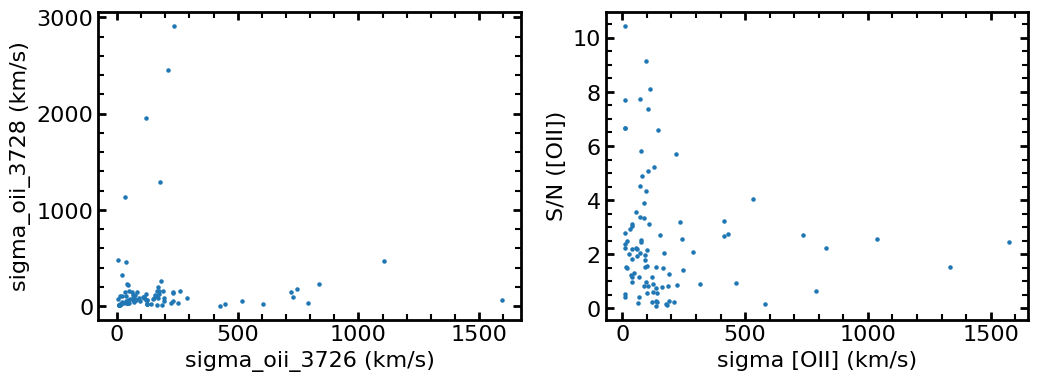

In [31]:
# Sanity Check: 
# Left panel -- plot the line widths
# Right panel -- SNR vs. Mean Linewidth

plt.figure(figsize = (12, 4))

plt.subplot2grid((1,2), (0,0))
plt.scatter(t_oii_comb['sigma_oii_3726'], t_oii_comb['sigma_oii_3728'], s=5)
plt.xlabel('sigma_oii_3726 (km/s)')
plt.ylabel('sigma_oii_3728 (km/s)')

plt.subplot2grid((1,2), (0,1))
plt.scatter(sig_oii, oii_snr, s=5)
plt.xlabel('sigma [OII] (km/s)')
plt.ylabel('S/N ([OII])')

In [32]:
# Select an example source with a high [OII] SNR and reasonable line width
ii = np.where((oii_snr>8)&(sig_oii>20)&(sig_oii<200))[0][0]

ii

15

In [33]:
lam_desi, flux_desi, ivar_desi = get_restframe_spectra(res_desi.records[ii], t_oii_comb['redshift_desi'].data[ii], rest_frame = True)
lam_sdss, flux_sdss, ivar_sdss = get_restframe_spectra(res_sdss.records[ii], t_oii_comb['redshift_sdss'].data[ii], rest_frame = True)

In [34]:
err_sdss = np.sqrt(1/ivar_sdss)
err_desi = np.sqrt(1/ivar_desi)

First, we plot the DESI and SDSS spectra of the same galaxy over the entire common spectral range. The DESI spectrum is shown in black, while the SDSS spectrum is in red.

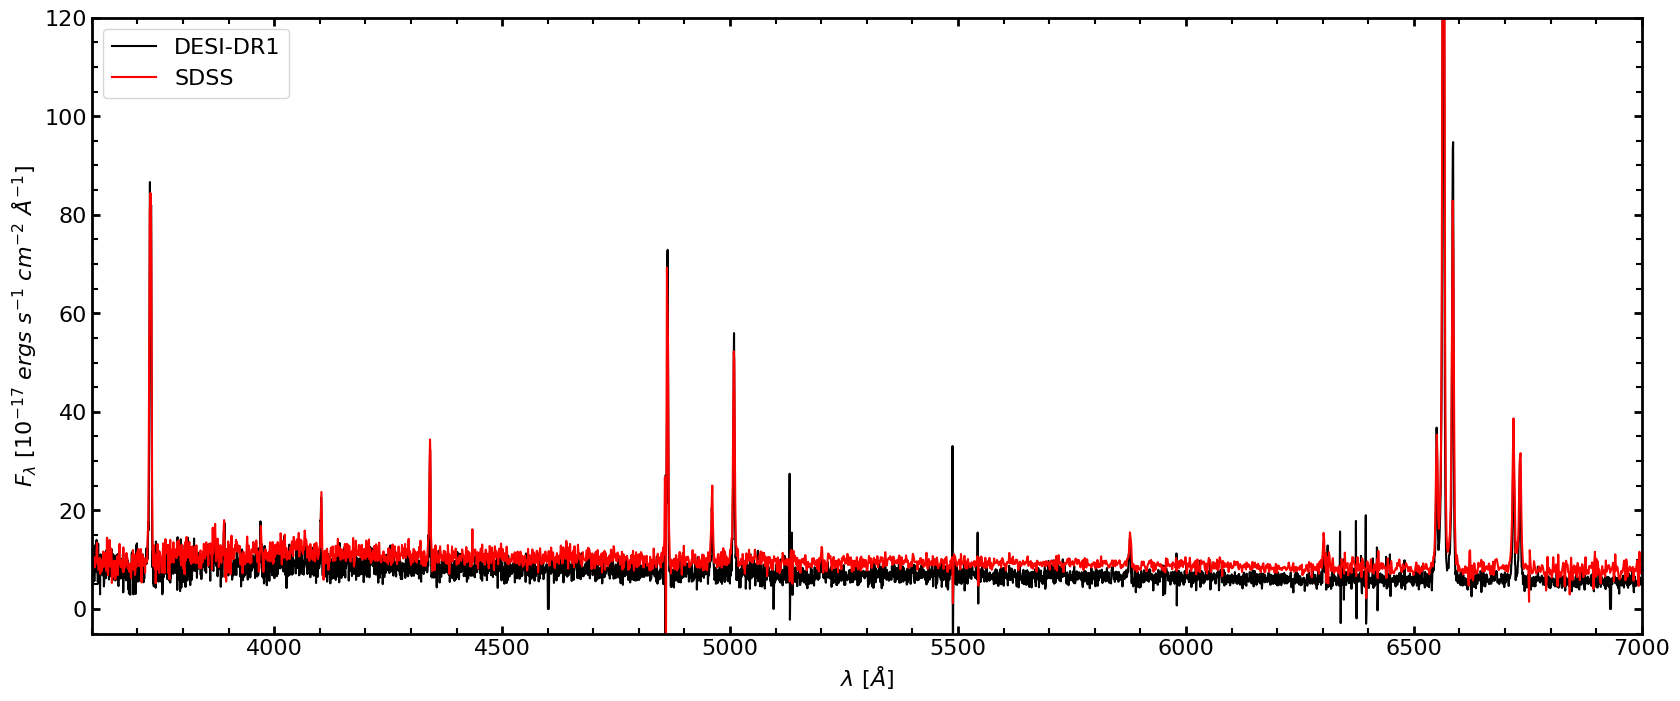

In [35]:
plt.figure(figsize = (20, 8))

plt.plot(lam_desi, flux_desi, color = 'k', label = 'DESI-DR1')
plt.plot(lam_sdss, flux_sdss, color = 'r', label = 'SDSS')
plt.xlim([3600, 7000])
plt.ylim([-5, 120])
plt.xlabel('$\lambda~[\AA]$')
plt.ylabel('$F_{\lambda}~[10^{-17}~ergs~s^{-1}~cm^{-2}~{\AA}^{-1}]$')
plt.legend(loc = 'upper left');

Next, we compare the spectra over a narrow spectra range surrounding the [OII] doublet region.  
The observed spectrum in both the panels is shown in black with the uncertainties as a gray shaded area.

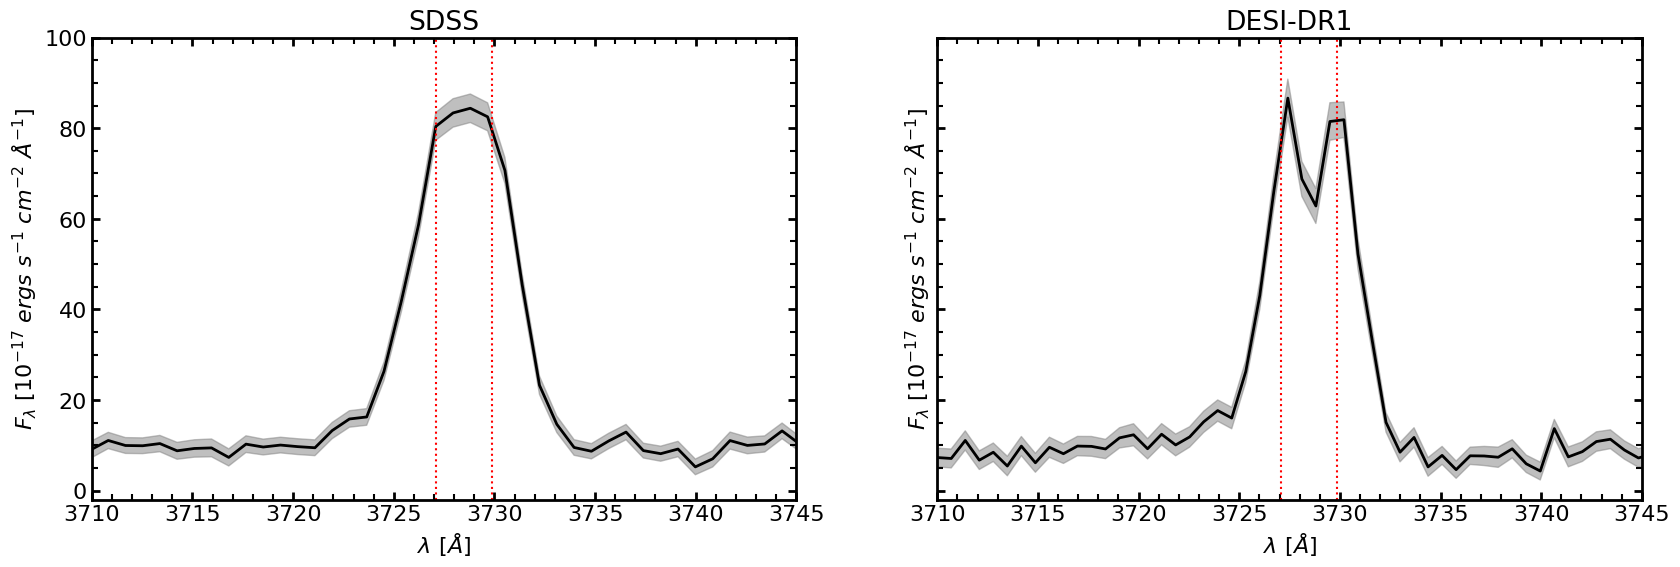

In [36]:
fig, axs = plt.subplots(1,2,figsize = (20,6), sharex = True, sharey = True)

axs[0].plot(lam_sdss, flux_sdss, color = 'k', lw = 2.0)
axs[0].fill_between(lam_sdss, flux_sdss-err_sdss, flux_sdss+err_sdss, color = 'grey', alpha = 0.5)
axs[1].plot(lam_desi, flux_desi, color = 'k', lw = 2.0)
axs[1].fill_between(lam_desi, flux_desi-err_desi, flux_desi+err_desi, color = 'grey', alpha = 0.5)
axs[0].axvline(3727.092, color = 'r', ls = ':')
axs[0].axvline(3729.875, color = 'r', ls = ':')
axs[1].axvline(3727.092, color = 'r', ls = ':')
axs[1].axvline(3729.875, color = 'r', ls = ':')

axs[0].set(xlabel = '$\lambda~[\AA]$', ylabel = '$F_{\lambda}~[10^{-17}~ergs~s^{-1}~cm^{-2}~{\AA}^{-1}]$', title = 'SDSS')
axs[1].set(xlim = [3710,3745], ylim = [-2,100], title = 'DESI-DR1', xlabel = '$\lambda~[\AA]$', ylabel = '$F_{\lambda}~[10^{-17}~ergs~s^{-1}~cm^{-2}~{\AA}^{-1}]$')

plt.show()

From the comparison plots above, we conclude the following:
* The flux from the source measured by SDSS is slightly higher than that measured by DESI. This is more pronounced in the case of the continuum. The observed flux is typically a function of the seeing at the time of spectroscopic observations and the fiber size. This observed difference is therefore partly because of the difference in fiber sizes between the two surveys. The SDSS fiber (3" in diameter) collects more light than the DESI fiber (1.5" in diameter), leading to a higher measured flux.

* The [OII] doublet is clearly resolved in DESI DR1, while it appears as a single emission-line in the case of SDSS. This is expected given that the DESI spectrograph has a higher spectral resolution than the SDSS and BOSS spectrographs, helping us resolve more spectral information. 

* Specifically, the ratio of the two components of [OII] doublet is an important tracer for measuring electron density in HII-regions. Using DESI, we can therefore study such important properties for a large number of galaxies.

* From the error bars on both the spectra, we see that they have similar signal-to-noise ratios. In fact, the exposure time for DESI is planned in such a way that the spectra will have same S/N ratio as SDSS for similar magnitude objects. However, it takes less time for DESI to reach such a S/N compared to SDSS.

* Another important point regarding DESI is that it pushes the target selection to much fainter objects than SDSS. 

#### <a class="anchor" id="resources"></a>
# Resources
* SDSS Website: https://www.sdss4.org/dr17/
* DESI Data Website: https://data.desi.lbl.gov/doc/
* SPARCL Links: https://sparclclient.readthedocs.io/en/latest/, https://astrosparcl.datalab.noirlab.edu/
* Schema details about the emissionlinesport catalog: https://datalab.noirlab.edu/data-explorer?showTable=sdss_dr12.emissionlinesport
* Introduction to SPARCL notebook: https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb

# References
* [Abareshi et al. 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220510939A/abstract)
* [Einasto et al. 2011](https://ui.adsabs.harvard.edu/abs/2011ApJ...736...51E/abstract)
* [Smee et al. 2013](https://ui.adsabs.harvard.edu/abs/2013AJ....146...32S/abstract)
* [Vogeley et al. 2004](https://ui.adsabs.harvard.edu/abs/2004ogci.conf....5V/abstract)